In [7]:
from numpy import mean,cov,double,cumsum,dot,linalg,array,rank
from pylab import plot,subplot,axis,stem,show,figure
%matplotlib inline  

def princomp(A):
 """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

 Returns :  
  coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
  score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
  latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
 """
 # computing eigenvalues and eigenvectors of covariance matrix
 M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
 [latent,coeff] = linalg.eig(cov(M)) # attention:not always sorted
 score = dot(coeff.T,M) # projection of the data in the new space
 return coeff,score,latent

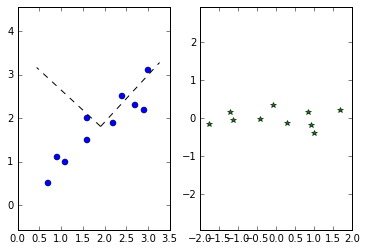

In [8]:
A = array([ [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9],
            [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1] ])

coeff, score, latent = princomp(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = mean(A,axis=1)
plot([0, -coeff[0,0]*2]+m[0], [0, -coeff[0,1]*2]+m[1],'--k')
plot([0, coeff[1,0]*2]+m[0], [0, coeff[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(score[0,:],score[1,:],'*g')
axis('equal')
show()

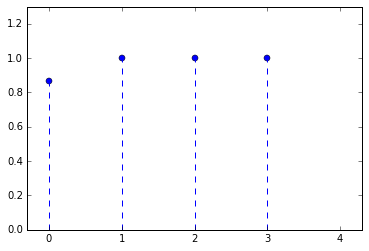

the principal component scores
[[  1.46414023e+00   1.58838284e+00   0.00000000e+00  -4.02455846e-16]
 [  2.76817063e+00  -1.29250326e+00  -1.11022302e-16   3.78169718e-16]
 [ -4.23231087e+00  -2.95879577e-01  -1.11022302e-16  -1.52655666e-16]]
The rank of A is
2


/opt/ds/lib/python3.4/site-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [9]:
A = array([[-1, 1, 2, 2],
           [-2, 3, 1, 0],
           [ 4, 0, 3,-1]],dtype=double)

coeff, score, latent = princomp(A)
perc = cumsum(latent)/sum(latent)
figure()
# the following plot shows that first two components 
# account for 100% of the variance.
stem(range(len(perc)),perc,'--b')
axis([-0.3,4.3,0,1.3])
show()
print ('the principal component scores')
print (score.T )# only the first two columns are nonzero
print ('The rank of A is')
print (rank(A))  # indeed, the rank of A is 2